Projet numérique
===========================================================================

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$\begin{cases}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{cases}$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

## Question 1 

Donner une interprétation physique à chaque terme de la dynamique. 
    Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_+\times\mathbb{R}_+$. Que peut-on dire de leur stabilité à ce stade ?
    
## Proposition de réponse

### Analyse des termes

On remarque qu'on a l'existence de deux seuils : $\frac\alpha\beta$ et $\frac\gamma\delta$. Si on a moins de prédateurs que $\frac\alpha\beta$, le nombre de proies augmente. Sinon, il diminue.

De même, le nombre de prédateurs ne peut augmenter que si on a **plus** de proies que $\frac\gamma\delta$.

Ainsi, 

* $\alpha$ représente la croissance "naturelle" des bêtes par reproduction

* $\beta$ représente les animaux mangés par les prédateurs

* $\gamma$ montre qu'en l'absence de proies, les prédateurs sont amenés à mourir (de faim)

* $\delta$ représente l'apport que fournissent les proies à leurs prédateurs.

### Points d'équilibre

On écrit le problème sous la forme $\dot X=f(X, t)$ avec $X=(x_1,x_2)$. On a $f(X, t)= (x_1(\alpha -\beta x_2),-x_2(\gamma - \delta x_1))$

Point d'équilibre : $X_0$ tel que $f(X_0)=0$

On doit avoir ($x_{10}=0$ ou $x_{20}=\frac\alpha\beta$) et ($x_{20}=0$ ou $x_{10}=\frac\gamma\delta$).

On obtient donc deux points d'équilibres : $(0, 0)$ et $\overline x:\!=(\frac\gamma\delta,\frac\alpha\beta)$

Quid de leur stabilité ?

On remarque que $f$ admet des dérivés partielles. On peut donc calculer sa jacobienne. 

On a $J_f(x_1, x_2)=
\begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1
\\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$

Regardons les valeurs de la jacobienne en $(0, 0)$ et en $\overline x$ :

* $(0,0)$ : $J_f(0, 0)=
    \begin{pmatrix}
    \alpha & 0
    \\
    0 & -\gamma
    \end{pmatrix}$

    Le cours affirme que si une des valeurs propres de $J_f(a)$ est à partie réelle strictement positive, $a$ est instable. Comme $\alpha>0$, on en déduit que $(0, 0)$ est un **point d'équilibre instable**.

* $\overline x$ : $J_f(\overline x_1,\overline x_2)=
    \begin{pmatrix}
    \alpha - \beta\overline x_2 & -\beta\overline x_1
    \\
    \delta\overline x_2 & -\gamma + \delta\overline x_1
    \end{pmatrix}$

    Impossible de conclure quant à la stabilité de $\overline x$ : on ne connaît par la valeur de $\overline x$ et ne peut donc pas déterminer le signe des parties réelles/imaginaires des valeurs propres.

## Question 2

A l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
    Intuiter le comportement des solutions. 
    On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

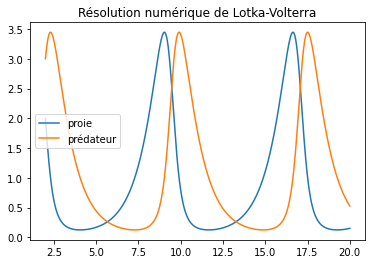

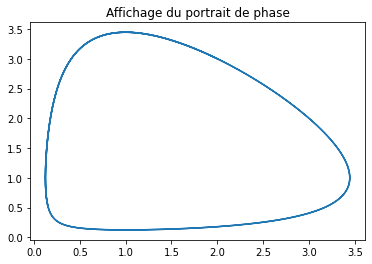

In [3]:
# Modules nécessaires
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# constantes
alpha, beta, gamma, delta = [1., 1., 1., 1.]

# Fonction pour le problème de Cauchy
def f(Y, t):
    x, y = Y
    dxdy = [x*(alpha-beta*y), -y*(gamma-delta*x)]
    return np.array(dxdy)

time = np.linspace(2, 20, 800)
X_0 = [2., 3.]

# Résolution numérique
solve = odeint(f, X_0, time)
#X, Y = np.meshgrid(x, y)

plt.title("Résolution numérique de Lotka-Volterra")
plt.plot(time, solve[:, 0], label="proie")
plt.plot(time, solve[:, 1], label="prédateur")
plt.legend()
plt.show();

plt.title("Affichage du portrait de phase")
plt.plot(solve[:, 0], solve[:, 1])
plt.show();

## Question 3

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans
    $\mathbb{R}_+\times\mathbb{R}_+$ reste dans $\mathbb{R}_+\times\mathbb{R}_+$ sur son ensemble de définition.

## Proposition de réponse

Raisonnons par l'absurde en supposant qu'il existe une solution initialisée dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$ qui ne reste pas dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$.
les solutions étant en particulier C°, alors $x_1$ ou $x_2$ s'annulent. Prenons $x_1$ (on adapte si c'est $x_2$).

On dispose donc $t_0 >0$ tel que $x_1(t_0)=0$

Or la fonction 
$\begin{cases}
\begin{align}
\mathbb{R}_+ & \to \mathbb{R}^2 \\
t & \to  (0,x_2(t_0)e^{\gamma (t-t_0)})
\end{align}
\end{cases}$
répond au problème de Cauchy avec pour conditions initiales $(x_1(t_0),x_2(t_0))=(0,x_2(t_0))$

Par unicité de la solution maximale, on a donc $x_1(0)=0$ ce contredit l'hypothèse de départ. Absurde !

Bilan : Toute solution initialisée dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$  reste dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$ sur son ensemble de définition.


## Question 4

On considère la fonction
    
$H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2$
    
définie sur $\mathbb{R}_+\times \mathbb{R}_+$.

Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_+\times \mathbb{R}_+$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_+\times \mathbb{R}_+$ est définie sur $\mathbb{R}$ et que $\bar{x}$ est stable.

## Proposition de réponse

On considère la fonction  $H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2$ définie sur $\mathbb{R}_+^*\times \mathbb{R}_+^*$. 

La question 3 assure l'existence de $H$ lorsque l'on initialise une solution dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$ 

On a $\frac{dH(x(t))}{dt} = \frac{\partial H(x(t))}{\partial x_1} \dot{x_1} + \frac{\partial H(x(t))}{\partial x_2} \dot{x_2}$ 
$= (\delta -\frac{\gamma}{x_1})(x_1(\alpha -\beta x_2))-(\beta -\frac{\alpha}{x_2})(x_2(\delta -\gamma x_1)) = 0$

Le long des solutions, $H$ est donc constant au cours du temps.

Le théorème du domaine maximal d'existence assure que toute solution maximale est définie sur un intervalle ouvert de type $]\tau_m^-;\tau_m^+[$ avec $\tau_m^-,\tau_m^+ \in \mathbb{R} \cup \{-\infty,+\infty\}$



Par l'absurde, supposons par exemple que $\tau_m^-$ est fini.

Le théorème assure alors $\underset{t \to t_m^{-}}{\lim} d((t,x(t)),\partial (J \times \mathbb{R}_+^*\times \mathbb{R}_+^*)) = 0$, ou $\underset{t \to t_m^{-}}{\lim} \| x(t) \| = +\infty$

Le 2ème cas est exclu d'avance car 
$\begin{cases}
\delta >0 \\
\beta >0
\end{cases}$
et on aurait donc $H(x_1,x_2) \underset{||x|| \to +\infty}\longrightarrow +\infty$ (alors que H est constant)


De même le 1er cas est exclu car on aurait alors $x_1  \underset{t \to \tau_m^-}\longrightarrow 0^+$ (ou pour $x_2$)
Alors on aurait $H(x_1(t),x_2(t)) \underset{t \to \tau_m^-}\longrightarrow +\infty$ (alors que H est constant)

Bilan : Toute solution maximale initialisée dans $\mathbb{R}_+^*\times \mathbb{R}_+^*$ est définie sur $\mathbb{R}$ tout entier.

## Question 5

Représenter les courbes de niveau de $H$. Qu'en conclue-t-on sur le comportement des solutions ?

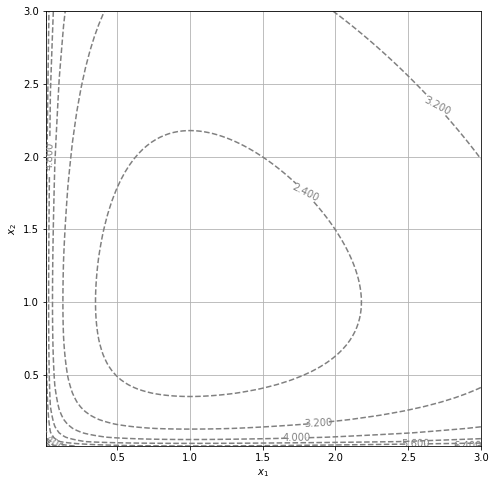

In [20]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    fig, ax = plt.subplots(figsize=(16,8))
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

def H(X):
    x1, x2 = np.array(X)
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)

display_contour(
    H, 
    x=np.linspace(0.01, 3, 100), 
    y=np.linspace(0.01, 3, 100), 
    levels=10 # 10 levels, automatically selected
)

On en déduit que les lignes de niveau sont centrées sur $\bar{x}$ 

## Question 6

Coder une fonction du type

        def solve_euler_explicit(f, x0, dt, t0, tf):
            ...
            return t, x

prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

In [5]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0, tf, dt)
    n = len(t) 
    x = np.array(x0)*np.ones((n, 1))

    for i in range(1, n):
        x0 = x[i-1]
        x[i] = x0+dt*f(x0, t[i])

    return t, x

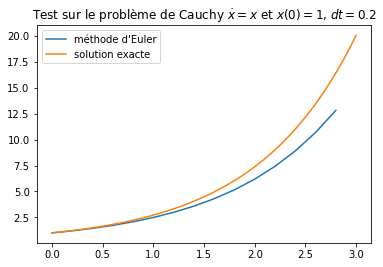

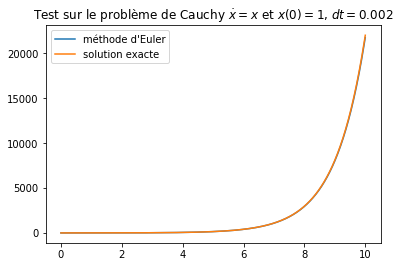

In [6]:
def g(x, t):
    return x

X, Y = solve_euler_explicit(g, 1, .2, 0, 3)
x, y = solve_euler_explicit(g, 1, .002, 0, 10)
T = np.linspace(0, 3, 100)
TT = np.linspace(0, 10, 1000)

plt.title("Test sur le problème de Cauchy $\dot x = x$ et $x(0)=1$, $dt=0.2$")
plt.plot(X, Y, label="méthode d'Euler")
plt.plot(T, np.exp(T), label="solution exacte")
plt.legend()
plt.show();
plt.title("Test sur le problème de Cauchy $\dot x = x$ et $x(0)=1$, $dt=0.002$")
plt.plot(x, y, label="méthode d'Euler")
plt.plot(TT, np.exp(TT), label="solution exacte")
plt.legend()

plt.show();

## Question 7

Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra. 
    Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? 
    On pourra tracer l'évolution de la fonction $H$.

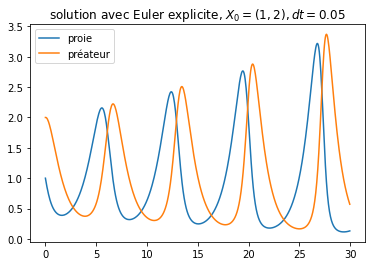

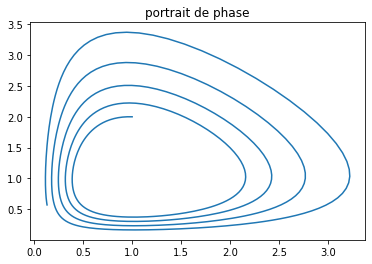

In [7]:
t, values = solve_euler_explicit(f, [1., 2.], .05, 0., 30.)

plt.title("solution avec Euler explicite, $X_0=(1,2), dt=0.05$")
plt.plot(t, values[:, 0], label="proie")
plt.plot(t, values[:, 1], label="préateur")
plt.legend()
plt.show();

plt.title("portrait de phase")
plt.plot(values[:, 0], values[:, 1])
plt.show();

## Proposition de réponse

On remarque que ça ne fonctionne pas aux temps longs : la solution diverge lentement, alors que le nombre maximal de proies/prédateurs ne doit pas bouger.

C'est probablement dû aux erreurs que l'on fait à chaque étape de la méthode d'Euler : ces erreurs se cumulent, et plus on avance, moins ça va ...

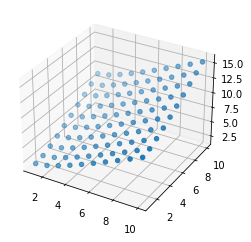

In [21]:
# Affichage de H
x = np.arange(1, 11, 1)
y = np.arange(1, 11, 1)
X, Y = np.meshgrid(x, y)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X, Y, H([X, Y]))
plt.show();

## Question 8

Coder maintenant une fonction du type

        def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
            ...
            return t, x

donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


In [9]:
from numpy.linalg import norm

def solve_euler_implicit(f, x0, dt, t0, tf, eps=.05):
    t = np.arange(t0, tf, dt)
    n = len(t)
    x = np.array(x0)*np.ones((n, 1))

    def F(i, y):
        return x[i-1] + dt*f(y, t[i])

    for i in range(1, n):
        condition = True
        x0 = x[i-1]
        x_k = x0+dt*f(x0, t[i])
        x_k1 = F(i, x_k)
        n_x_0 = norm(x_k)
        while condition:
            if np.abs(norm(x_k1-x_k)/n_x_0) < eps:
                x[i] = x_k1
                condition = False
            else:
                x_k, x_k1 = x_k1, F(i, x_k1)
        
    return t, x

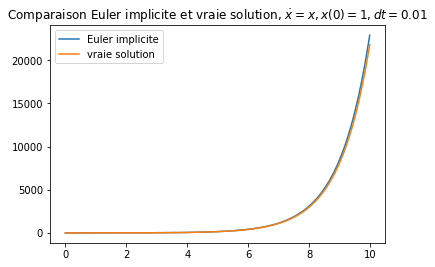

In [10]:
# Testons sur l'exponentielle

t, x = solve_euler_implicit(g, 1., .01, 0., 10.)

plt.title("Comparaison Euler implicite et vraie solution, $\dot x = x, x(0)=1, dt=0.01$")
plt.plot(t, x, label="Euler implicite")
plt.plot(t, np.exp(t), label="vraie solution")
plt.legend()
plt.show();

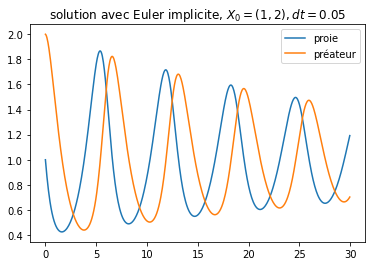

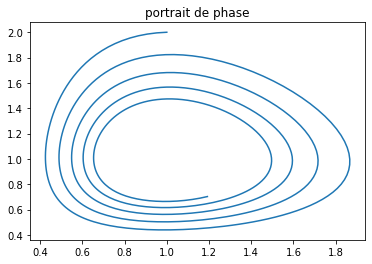

In [11]:
# Testons pour Lotka-Volterra

t, values = solve_euler_implicit(f, [1., 2.], .05, 0., 30.)

plt.title("solution avec Euler implicite, $ X_0=(1,2),dt=0.05$")
plt.plot(t, values[:, 0], label="proie")
plt.plot(t, values[:, 1], label="préateur")
plt.legend()
plt.show();

plt.title("portrait de phase")
plt.plot(values[:, 0], values[:, 1])
plt.show();

## Question 9

Expliquer pourquoi les solutions de
$\begin{cases}
\dot{x_1} =x_1(\alpha−\beta x_2)−u(x_1,x_2)(H(x_1,x_2)−H_0)
\\
\dot{x_2} =x_2(\gamma−\delta x_1)−u(x_1,x_2)(H(x_1,x_2)−H_0)
\end{cases}$
sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb{R}^2 \rightarrow \mathbb{R}^2$ continûment différentiable.



### Proposition de réponse


Puisque $H$ est constant le long des solutions de l'ED de Lokta-Volterra (EDLV), 
on a $x$ solution de l'EDLV $\Rightarrow x$ solution de la nouvelle équation.

L'espace engendré par les solutions de telles équations différentielles est de dimension 2.
On est en dimension finie donc on a équivalence entre les assertions "être solution de l'EDLV" et "être solution de la nouvelle ED".

Bilan : Les solutions de la nouvelle équation sont les mêmes que celle de Lokta-Volterra.

## Question 10

Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H − H_0$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir u tel que
$\frac{d}{dt}(H(x(t))-H_0) = -k||\nabla H(x(t))||^2 (H(x(t))-H_0)$

En déduire qu’alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l’infini si $x$ reste à une distance strictement positive de $\bar{x}$.


### Proposition de réponse
$\begin{align}
\frac{d}{dt}(H(x(t))-H_0) = \frac{dH(x(t))}{dt} &= \frac{\partial H(x(t))}{\partial x_1} \dot{x_1} + \frac{\partial H(x(t))}{\partial x_2} \dot{x_2}\\
 &= (\delta -\frac{\gamma}{x_1})(x_1(\alpha -\beta x_2)+u_1(x_1,x_2)(H(x_1,x_2)−H_0))-(\beta -\frac{\alpha}{x_2})(x_2(\gamma -\delta x_1)+u_2(x_1,x_2)(H(x_1,x_2)−H_0)\\
 &= [(\delta -\frac{\gamma}{x_1})u_1(x_1,x_2)-(\beta -\frac{\alpha}{x_2})u_2(x_1,x_2)](H(x_1,x_2)−H_0)
\end{align}$

Or $\nabla H(x(t)) = (\delta -\frac{\gamma}{x_1},\beta -\frac{\alpha}{x_2})$

Ainsi en prenant $u_k(x_1,x_2)=k(\delta -\frac{\gamma}{x_1},-\beta +\frac{\alpha}{x_2})$ où $k \in \mathbb{R}^*$ (qui est bien continuement différentiable) on a l'équation différentielle voulue.



Alors on a $H\circ x(t)-H_0 = C \exp(k\int_0^t ||\nabla H(x(s))||^2ds).$

Par ailleurs, $||\nabla H(x(s))||=0 \Leftrightarrow \nabla H(x(s))=(0,0) \Rightarrow \frac{\partial H}{\partial x_1} = 0 \ et \ \frac{\partial H}{\partial x_2} = 0  \Leftrightarrow x(s) = \bar x$

Donc si $\exists M>0$ tel que $\forall t>M, x(t)\neq \bar x$
Alors la contraposée de l'implication précédente assure que $||\nabla H(x(s))|| > 0$ et par croissance de l'intégrle $\int_0^t ||\nabla H(x(s))||ds >0$.
Ainsi $H(x(t))$ tend exponentiellement vers $H_0$ lorsque $t \to \infty $

## Question 11

En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

In [34]:
# Calcul du gradient de H

def grad_H(X):
    x1, x2 = np.array(X)
    dxdy = [delta - gamma/x1, beta - alpha/x2]
    return np.array(dxdy)

k = 1.
u = lambda X : k*grad_H(X)

def f_stable(X, t):

    x, y = np.array(X)
    return np.array([x*(alpha-beta*y), -y*(gamma-delta*x)]) - np.dot(u(X), H(X) - H0)

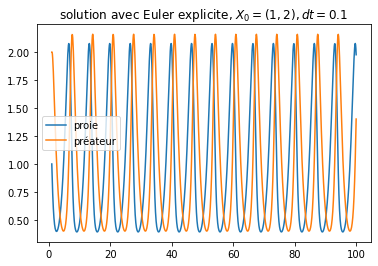

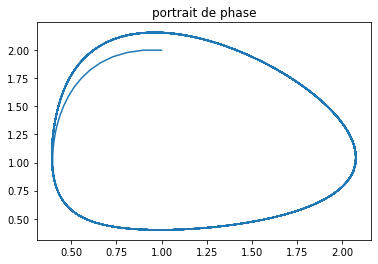

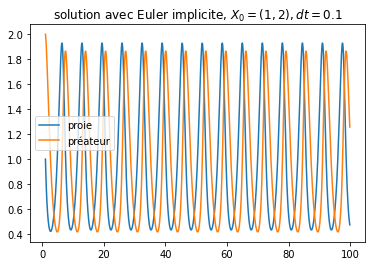

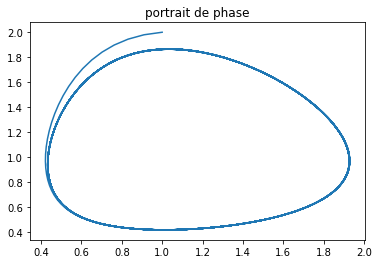

In [45]:
X0 = np.array([1., 2.])
H0 = H(X0)
t, values = solve_euler_explicit(f_stable, X0, .1, 1., 100.)

plt.title("solution avec Euler explicite, $ X_0=(1,2),dt=0.1$")
plt.plot(t, values[:, 0], label="proie")
plt.plot(t, values[:, 1], label="préateur")
plt.legend()
plt.show();

plt.title("portrait de phase")
plt.plot(values[:, 0], values[:, 1])
plt.show();

t, values = solve_euler_implicit(f_stable, X0, .1, 1., 100.)

plt.title("solution avec Euler implicite, $ X_0=(1,2),dt=0.1$")
plt.plot(t, values[:, 0], label="proie")
plt.plot(t, values[:, 1], label="préateur")
plt.legend()
plt.show();

plt.title("portrait de phase")
plt.plot(values[:, 0], values[:, 1])
plt.show();

## Proposition de réponse

On applique le schéma d'Euler au nouveau système d'équations : ça marche !